In [48]:
# set up environment by importing all necessary libraries.

# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import pandas as pd

import numpy as np

sns.set()

In [2]:
# load dataset and drop N/A
df = pd.read_csv('./data/vgsales.csv').dropna()
print(df.shape)

(16291, 11)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16291 non-null int64
Name            16291 non-null object
Platform        16291 non-null object
Year            16291 non-null float64
Genre           16291 non-null object
Publisher       16291 non-null object
NA_Sales        16291 non-null float64
EU_Sales        16291 non-null float64
JP_Sales        16291 non-null float64
Other_Sales     16291 non-null float64
Global_Sales    16291 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [4]:
# convert some attributes to it's proper type
df['Year'] = df['Year'].astype('int64')

In [5]:
# Summary Statistics:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [32]:
df['Genre'].value_counts()

Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: Genre, dtype: int64

In [34]:
df['Platform'].value_counts()

DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [36]:
df['Year'].value_counts()

2009    1431
2008    1428
2010    1257
2007    1201
2011    1136
2006    1008
2005     936
2002     829
2003     775
2004     744
2012     655
2015     614
2014     580
2013     546
2001     482
1998     379
2000     349
2016     342
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
2017       3
2020       1
Name: Year, dtype: int64

In [9]:
df['Publisher'].value_counts()

Electronic Arts                           1339
Activision                                 966
Namco Bandai Games                         928
Ubisoft                                    918
Konami Digital Entertainment               823
THQ                                        712
Nintendo                                   696
Sony Computer Entertainment                682
Sega                                       632
Take-Two Interactive                       412
Capcom                                     376
Atari                                      347
Tecmo Koei                                 338
Square Enix                                231
Warner Bros. Interactive Entertainment     217
Disney Interactive Studios                 214
Midway Games                               196
Eidos Interactive                          196
505 Games                                  192
Microsoft Game Studios                     189
Acclaim Entertainment                      184
D3Publisher  

In [10]:
# create new attribute region sales share
df['NA_share'] = df['NA_Sales'] / df['Global_Sales']
df['EU_share'] = df['EU_Sales'] / df['Global_Sales']
df['JP_share'] = df['JP_Sales'] / df['Global_Sales']
df['Other_share'] = df['Other_Sales'] / df['Global_Sales']

# Best selling games in each regions:

In [11]:
df.sort_values(by='NA_Sales', ascending=False).head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_share,EU_share,JP_share,Other_share
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,0.501450,0.350737,0.045564,0.102248
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,0.722664,0.088966,0.169235,0.019135
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,0.951254,0.022254,0.009890,0.016602
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,0.766689,0.074686,0.139458,0.019167
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,0.442490,0.359576,0.105807,0.092406


In [12]:
df.sort_values(by='EU_Sales', ascending=False).head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_share,EU_share,JP_share,Other_share
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,0.501450,0.350737,0.045564,0.102248
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,0.442490,0.359576,0.105807,0.092406
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,0.477273,0.333636,0.099394,0.089697
10,11,Nintendogs,DS,2005,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76,0.366317,0.444265,0.077948,0.111066
16,17,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40,0.327570,0.433178,0.045327,0.193458


In [13]:
df.sort_values(by='JP_Sales', ascending=False).head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_share,EU_share,JP_share,Other_share
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,0.359260,0.283392,0.325789,0.031878
12,13,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10,0.389610,0.267532,0.311688,0.030736
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,0.722664,0.088966,0.169235,0.019135
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,0.379207,0.307564,0.216594,0.096634
20,21,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36,0.349673,0.246187,0.328976,0.074619


In [14]:
df.sort_values(by='Global_Sales', ascending=False).head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_share,EU_share,JP_share,Other_share
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,0.501450,0.350737,0.045564,0.102248
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,0.722664,0.088966,0.169235,0.019135
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,0.442490,0.359576,0.105807,0.092406
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,0.477273,0.333636,0.099394,0.089697
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,0.359260,0.283392,0.325789,0.031878


In [15]:
region_sales_df = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].groupby('Genre').sum()

In [16]:
# create new attribute region sales share
region_sales_df['NA_share'] = region_sales_df['NA_Sales'] / region_sales_df['Global_Sales']
region_sales_df['EU_share'] = region_sales_df['EU_Sales'] / region_sales_df['Global_Sales']
region_sales_df['JP_share'] = region_sales_df['JP_Sales'] / region_sales_df['Global_Sales']
region_sales_df['Other_share'] = region_sales_df['Other_Sales'] / region_sales_df['Global_Sales']

In [17]:
region_sales_df.sort_values(by='NA_share', ascending=False).head(5)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_share,EU_share,JP_share,Other_share
Genre,,,,,,,,,
Shooter,575.16,310.45,38.18,101.90,1026.20,0.560476,0.302524,0.037205,0.099298
Platform,445.99,200.65,130.65,51.51,829.13,0.537901,0.242001,0.157575,0.062125
Sports,670.09,371.34,134.76,132.65,1309.24,0.511816,0.283630,0.102930,0.101318
Puzzle,122.01,50.52,56.68,12.47,242.21,0.503736,0.208579,0.234012,0.051484
Misc,396.92,211.77,106.67,73.92,789.87,0.502513,0.268107,0.135048,0.093585


In [18]:
region_sales_df.sort_values(by='JP_share', ascending=False).head(5)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_share,EU_share,JP_share,Other_share
Genre,,,,,,,,,
Role-Playing,326.50,187.57,350.29,59.38,923.83,0.353420,0.203035,0.379171,0.064276
Strategy,67.83,44.84,49.10,11.23,173.27,0.391470,0.258787,0.283373,0.064812
Puzzle,122.01,50.52,56.68,12.47,242.21,0.503736,0.208579,0.234012,0.051484
Adventure,101.93,63.74,51.99,16.70,234.59,0.434503,0.271708,0.221621,0.071188
Fighting,220.74,100.00,87.15,36.19,444.05,0.497106,0.225200,0.196262,0.081500


In [19]:
region_sales_df.sort_values(by='EU_share', ascending=False).head(5)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_share,EU_share,JP_share,Other_share
Genre,,,,,,,,,
Racing,356.93,236.31,56.61,76.68,726.76,0.491125,0.325155,0.077894,0.105509
Shooter,575.16,310.45,38.18,101.90,1026.20,0.560476,0.302524,0.037205,0.099298
Action,861.77,516.48,158.65,184.92,1722.84,0.500203,0.299784,0.092086,0.107334
Simulation,181.78,113.02,63.54,31.36,389.98,0.466126,0.289810,0.162931,0.080414
Sports,670.09,371.34,134.76,132.65,1309.24,0.511816,0.283630,0.102930,0.101318


In [20]:
region_sales_df.sort_values(by='Other_share', ascending=False).head(5)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_share,EU_share,JP_share,Other_share
Genre,,,,,,,,,
Action,861.77,516.48,158.65,184.92,1722.84,0.500203,0.299784,0.092086,0.107334
Racing,356.93,236.31,56.61,76.68,726.76,0.491125,0.325155,0.077894,0.105509
Sports,670.09,371.34,134.76,132.65,1309.24,0.511816,0.283630,0.102930,0.101318
Shooter,575.16,310.45,38.18,101.90,1026.20,0.560476,0.302524,0.037205,0.099298
Misc,396.92,211.77,106.67,73.92,789.87,0.502513,0.268107,0.135048,0.093585


# Best selling genre in each region:

In [21]:
region_sales_df.sort_values(by='Global_Sales', ascending=False).head(5)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_share,EU_share,JP_share,Other_share
Genre,,,,,,,,,
Action,861.77,516.48,158.65,184.92,1722.84,0.500203,0.299784,0.092086,0.107334
Sports,670.09,371.34,134.76,132.65,1309.24,0.511816,0.283630,0.102930,0.101318
Shooter,575.16,310.45,38.18,101.90,1026.20,0.560476,0.302524,0.037205,0.099298
Role-Playing,326.50,187.57,350.29,59.38,923.83,0.353420,0.203035,0.379171,0.064276
Platform,445.99,200.65,130.65,51.51,829.13,0.537901,0.242001,0.157575,0.062125


In [22]:
region_sales_df.sort_values(by='NA_Sales', ascending=False).head(5)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_share,EU_share,JP_share,Other_share
Genre,,,,,,,,,
Action,861.77,516.48,158.65,184.92,1722.84,0.500203,0.299784,0.092086,0.107334
Sports,670.09,371.34,134.76,132.65,1309.24,0.511816,0.283630,0.102930,0.101318
Shooter,575.16,310.45,38.18,101.90,1026.20,0.560476,0.302524,0.037205,0.099298
Platform,445.99,200.65,130.65,51.51,829.13,0.537901,0.242001,0.157575,0.062125
Misc,396.92,211.77,106.67,73.92,789.87,0.502513,0.268107,0.135048,0.093585


In [23]:
region_sales_df.sort_values(by='EU_Sales', ascending=False).head(5)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_share,EU_share,JP_share,Other_share
Genre,,,,,,,,,
Action,861.77,516.48,158.65,184.92,1722.84,0.500203,0.299784,0.092086,0.107334
Sports,670.09,371.34,134.76,132.65,1309.24,0.511816,0.283630,0.102930,0.101318
Shooter,575.16,310.45,38.18,101.90,1026.20,0.560476,0.302524,0.037205,0.099298
Racing,356.93,236.31,56.61,76.68,726.76,0.491125,0.325155,0.077894,0.105509
Misc,396.92,211.77,106.67,73.92,789.87,0.502513,0.268107,0.135048,0.093585


In [24]:
region_sales_df.sort_values(by='JP_Sales', ascending=False).head(5)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_share,EU_share,JP_share,Other_share
Genre,,,,,,,,,
Role-Playing,326.50,187.57,350.29,59.38,923.83,0.353420,0.203035,0.379171,0.064276
Action,861.77,516.48,158.65,184.92,1722.84,0.500203,0.299784,0.092086,0.107334
Sports,670.09,371.34,134.76,132.65,1309.24,0.511816,0.283630,0.102930,0.101318
Platform,445.99,200.65,130.65,51.51,829.13,0.537901,0.242001,0.157575,0.062125
Misc,396.92,211.77,106.67,73.92,789.87,0.502513,0.268107,0.135048,0.093585


In [25]:
region_sales_df.sort_values(by='Other_Sales', ascending=False).head(5)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_share,EU_share,JP_share,Other_share
Genre,,,,,,,,,
Action,861.77,516.48,158.65,184.92,1722.84,0.500203,0.299784,0.092086,0.107334
Sports,670.09,371.34,134.76,132.65,1309.24,0.511816,0.283630,0.102930,0.101318
Shooter,575.16,310.45,38.18,101.90,1026.20,0.560476,0.302524,0.037205,0.099298
Racing,356.93,236.31,56.61,76.68,726.76,0.491125,0.325155,0.077894,0.105509
Misc,396.92,211.77,106.67,73.92,789.87,0.502513,0.268107,0.135048,0.093585


# Some plots:

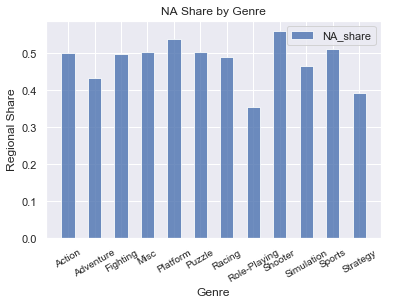

In [26]:
fig, ax = plt.subplots()
index = np.arange(len(region_sales_df.index))
bar_width = 0.5
opacity = 0.8
rect1 = ax.bar(index, region_sales_df['NA_share'], bar_width, alpha=opacity, label='NA_share')
plt.xlabel('Genre')
plt.ylabel('Regional Share')
plt.title('NA Share by Genre')
plt.xticks(index, region_sales_df.index, fontsize=10, rotation=30)
plt.legend()
plt.show()

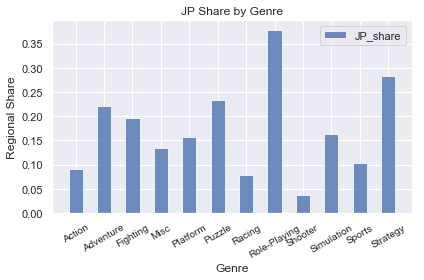

In [27]:
fig, ax = plt.subplots()
index = np.arange(len(region_sales_df.index))
bar_width = 0.5
opacity = 0.8
rect2 = plt.bar(index, region_sales_df['JP_share'], bar_width, alpha=opacity, label='JP_share')
plt.xlabel('Genre')
plt.ylabel('Regional Share')
plt.title('JP Share by Genre')
plt.xticks(index, region_sales_df.index, fontsize=10, rotation=30)
plt.legend()
plt.tight_layout()
plt.show()

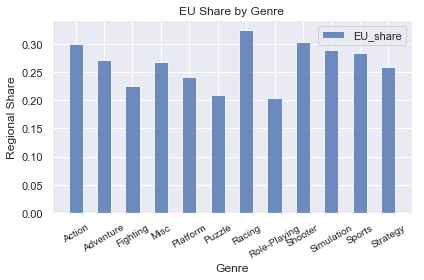

In [28]:
fig, ax = plt.subplots()
index = np.arange(len(region_sales_df.index))
bar_width = 0.5
opacity = 0.8
rect3 = plt.bar(index, region_sales_df['EU_share'], bar_width, alpha=opacity, label='EU_share')
plt.xlabel('Genre')
plt.ylabel('Regional Share')
plt.title('EU Share by Genre')
plt.xticks(index, region_sales_df.index, fontsize=10, rotation=30)
plt.legend()
plt.tight_layout()
plt.show()

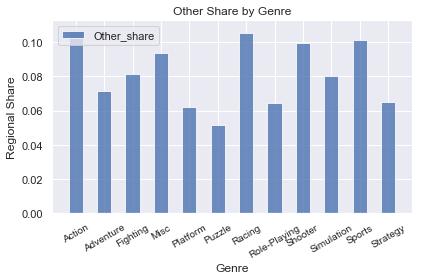

In [29]:
fig, ax = plt.subplots()
index = np.arange(len(region_sales_df.index))
bar_width = 0.5
opacity = 0.8
rect3 = plt.bar(index, region_sales_df['Other_share'], bar_width, alpha=opacity, label='Other_share')
plt.xlabel('Genre')
plt.ylabel('Regional Share')
plt.title('Other Share by Genre')
plt.xticks(index, region_sales_df.index, fontsize=10, rotation=30)
plt.legend()
plt.tight_layout()
plt.show()

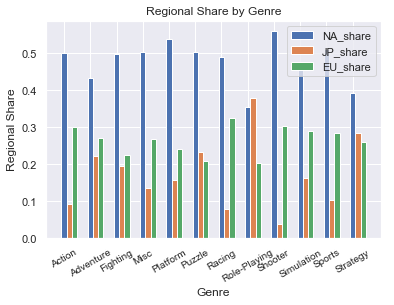

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)
index = np.arange(len(region_sales_df.index))
bar_width = 0.2
rect1 = ax.bar(index, region_sales_df['NA_share'], bar_width, label='NA_share')
rect2 = ax.bar(index + bar_width, region_sales_df['JP_share'], bar_width, label='JP_share')
rect3 = ax.bar(index + 2 * bar_width, region_sales_df['EU_share'], bar_width, label='EU_share')
plt.xlabel('Genre')
plt.ylabel('Regional Share')
plt.title('Regional Share by Genre')
plt.xticks(index, region_sales_df.index, fontsize=10, rotation=30)
plt.legend()
plt.show()

# Group by publisher

In [37]:
publisher_df = df[['Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].groupby('Publisher').sum()
publisher_df.sample(10)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,
Jack of All Games,0.31,0.10,0.00,0.01,0.42
Telegames,0.91,0.06,0.00,0.06,1.03
Happinet,0.00,0.00,0.18,0.00,0.18
Virgin Interactive,18.99,12.94,8.94,3.03,43.87
ArtDink,0.07,0.05,0.59,0.04,0.73
Mud Duck Productions,0.52,0.25,0.00,0.06,0.85
Starfish,0.39,0.19,0.10,0.03,0.72
Arika,0.04,0.03,0.02,0.01,0.09
Black Label Games,0.59,0.46,0.00,0.15,1.20


In [46]:
# to see in total which publisher has the best selling:
publisher_df.sort_values(by='Global_Sales', ascending=False).head(10)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,
Nintendo,815.75,418.30,454.99,95.19,1784.43
Electronic Arts,584.22,367.38,13.98,127.63,1093.39
Activision,426.01,213.72,6.54,74.79,721.41
Sony Computer Entertainment,265.22,187.55,74.10,80.40,607.28
Ubisoft,252.81,163.03,7.33,50.16,473.54
Take-Two Interactive,220.47,117.95,5.83,55.20,399.30
THQ,208.60,94.60,5.01,32.11,340.44
Konami Digital Entertainment,88.91,68.62,90.93,29.91,278.56
Sega,108.78,81.41,56.19,24.30,270.70


In [39]:
publisher_df.sort_values(by='NA_Sales', ascending=False).head(5)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,
Nintendo,815.75,418.30,454.99,95.19,1784.43
Electronic Arts,584.22,367.38,13.98,127.63,1093.39
Activision,426.01,213.72,6.54,74.79,721.41
Sony Computer Entertainment,265.22,187.55,74.10,80.40,607.28
Ubisoft,252.81,163.03,7.33,50.16,473.54


In [40]:
publisher_df.sort_values(by='EU_Sales', ascending=False).head(5)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,
Nintendo,815.75,418.30,454.99,95.19,1784.43
Electronic Arts,584.22,367.38,13.98,127.63,1093.39
Activision,426.01,213.72,6.54,74.79,721.41
Sony Computer Entertainment,265.22,187.55,74.10,80.40,607.28
Ubisoft,252.81,163.03,7.33,50.16,473.54


In [41]:
publisher_df.sort_values(by='JP_Sales', ascending=False).head(5)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,
Nintendo,815.75,418.30,454.99,95.19,1784.43
Namco Bandai Games,69.38,42.61,126.84,14.64,253.65
Konami Digital Entertainment,88.91,68.62,90.93,29.91,278.56
Sony Computer Entertainment,265.22,187.55,74.10,80.40,607.28
Capcom,78.45,39.16,67.38,14.82,199.95


In [42]:
publisher_df.sort_values(by='Other_Sales', ascending=False).head(5)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,
Electronic Arts,584.22,367.38,13.98,127.63,1093.39
Nintendo,815.75,418.30,454.99,95.19,1784.43
Sony Computer Entertainment,265.22,187.55,74.10,80.40,607.28
Activision,426.01,213.72,6.54,74.79,721.41
Take-Two Interactive,220.47,117.95,5.83,55.20,399.30


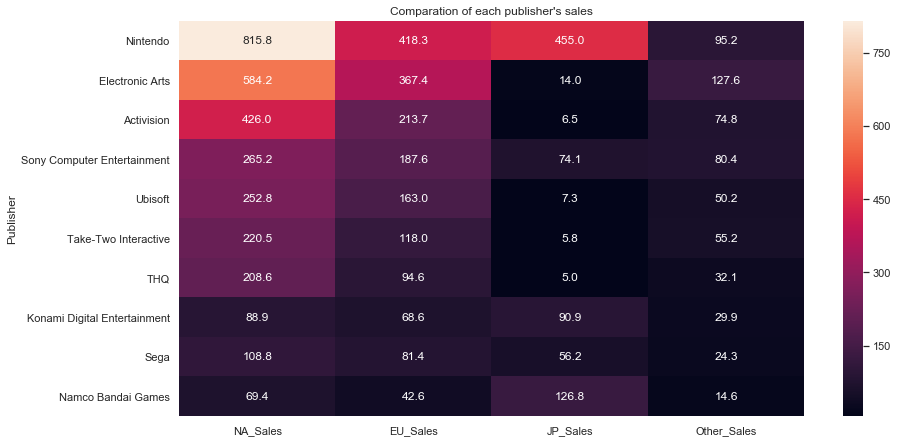

In [53]:
sub_df = publisher_df.sort_values(by='Global_Sales', ascending=False).head(10)
plt.figure(figsize=(14, 16))
sns.set(font_scale=1.0)
plt.subplot(211)
sns.heatmap(sub_df.loc[:'Namco Bandai Games', 'NA_Sales':'Other_Sales'], annot=True, fmt = '.1f')
plt.title("Comparation of each publisher's sales")
# plt.subplot(212)
# sns.heatmap(publisher_df.loc[:10,'NA_Sales%':'Other_Sales%'], vmax =1, vmin=0, annot=True, fmt = '.2%')
# plt.title("Comparation of each area in each Genre(Pencentage)")
plt.show()